# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [44]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [45]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

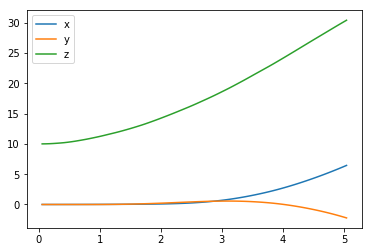

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

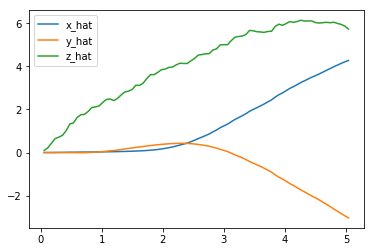

In [47]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

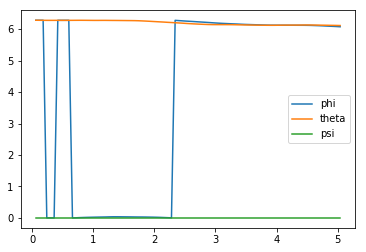

In [48]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

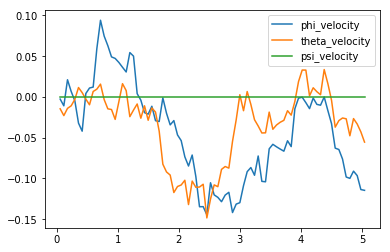

In [49]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

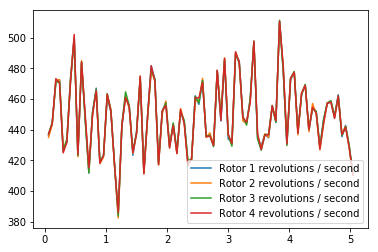

In [50]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [51]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[  6.44957445  -2.21612201  30.41081359   6.07624772   6.11529818   0.        ]
[ 4.27384353 -3.0318607   5.72650795]
[-0.11457314 -0.05540172  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [52]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.415 (best =   0.156), noise_scale = 3.2625

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [69]:
## TODO: Train your agent here.
import sys
import pandas as pd
from agents.agent import DDPG
from task_taskoff import Takeoff

num_episodes = 700
init_pose = np.array([0., 0., 1., 0., 0., 0.])
target_pos = np.array([0., 0., 20.])
task = Takeoff(init_pose=init_pose,target_pos=target_pos)
agent = DDPG(task) 

labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
all_results = []
plot_data = {x : [] for x in ['episode', 'total_reward']}

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() 
    results = {x : [] for x in labels}
    
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step_new(action)
        agent.step(action=action, reward=reward, next_state=next_state, done=done)
        state = next_state
        
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])

        
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(
                i_episode, agent.score, agent.best_score))  

            all_results.append(results)
            plot_data['episode'].append(i_episode)
            plot_data['total_reward'].append(agent.total_reward)
            break
    sys.stdout.flush()

Episode =    1, score =   0.000 (best =    -inf)
Episode =    2, score =   0.000 (best =    -inf)
Episode =    3, score =   0.000 (best =    -inf)
Episode =    4, score = -66.750 (best = -40.734)
Episode =    5, score = -67.682 (best = -28.741)
Episode =    6, score = -65.024 (best = -28.741)
Episode =    7, score = -81.605 (best = -28.741)
Episode =    8, score = -90.166 (best = -28.741)
Episode =    9, score = -95.550 (best = -28.741)
Episode =   10, score = -98.375 (best = -28.741)
Episode =   11, score = -101.294 (best = -28.741)
Episode =   12, score = -95.116 (best = -28.741)
Episode =   13, score = -87.284 (best = -28.741)
Episode =   14, score = -78.082 (best = -28.741)
Episode =   15, score = -65.958 (best = -28.741)
Episode =   16, score = -63.128 (best = -28.741)
Episode =   17, score = -64.038 (best = -28.741)
Episode =   18, score = -73.280 (best = -28.741)
Episode =   19, score = -83.222 (best = -28.741)
Episode =   20, score = -88.472 (best = -28.741)
Episode =   21, sco

Episode =  167, score = -106.928 (best = -28.741)
Episode =  168, score = -111.422 (best = -28.741)
Episode =  169, score = -103.596 (best = -28.741)
Episode =  170, score = -95.887 (best = -28.741)
Episode =  171, score = -108.499 (best = -28.741)
Episode =  172, score = -95.731 (best = -28.741)
Episode =  173, score = -104.530 (best = -28.741)
Episode =  174, score = -74.525 (best = -28.741)
Episode =  175, score = -99.195 (best = -28.741)
Episode =  176, score = -71.778 (best = -28.741)
Episode =  177, score = -77.982 (best = -28.741)
Episode =  178, score = -109.310 (best = -28.741)
Episode =  179, score = -100.997 (best = -28.741)
Episode =  180, score = -101.099 (best = -28.741)
Episode =  181, score = -97.988 (best = -28.741)
Episode =  182, score = -105.234 (best = -28.741)
Episode =  183, score = -105.948 (best = -28.741)
Episode =  184, score = -107.992 (best = -28.741)
Episode =  185, score = -95.882 (best = -28.741)
Episode =  186, score = -78.351 (best = -28.741)
Episode =

Episode =  334, score = -61.976 (best =  45.324)
Episode =  335, score = -61.592 (best =  45.324)
Episode =  336, score = -61.050 (best =  45.324)
Episode =  337, score = -60.851 (best =  45.324)
Episode =  338, score = -60.723 (best =  45.324)
Episode =  339, score = -62.791 (best =  45.324)
Episode =  340, score = -69.969 (best =  45.324)
Episode =  341, score = -85.917 (best =  45.324)
Episode =  342, score = -60.437 (best =  45.324)
Episode =  343, score = -61.609 (best =  45.324)
Episode =  344, score = -59.324 (best =  45.324)
Episode =  345, score = -59.181 (best =  45.324)
Episode =  346, score = -62.123 (best =  45.324)
Episode =  347, score = -61.171 (best =  45.324)
Episode =  348, score = -65.790 (best =  45.324)
Episode =  349, score = -90.474 (best =  45.324)
Episode =  350, score = -75.334 (best =  45.324)
Episode =  351, score = -82.790 (best =  45.324)
Episode =  352, score = -73.439 (best =  45.324)
Episode =  353, score = -71.090 (best =  45.324)
Episode =  354, scor

Episode =  502, score =  49.348 (best =  49.739)
Episode =  503, score =  49.652 (best =  49.739)
Episode =  504, score =  49.621 (best =  49.739)
Episode =  505, score =  48.452 (best =  49.739)
Episode =  506, score =  46.546 (best =  49.739)
Episode =  507, score =  49.256 (best =  49.739)
Episode =  508, score =  49.610 (best =  49.739)
Episode =  509, score =  49.812 (best =  49.812)
Episode =  510, score =  49.316 (best =  49.812)
Episode =  511, score =  49.489 (best =  49.812)
Episode =  512, score =  49.517 (best =  49.812)
Episode =  513, score =  49.389 (best =  49.812)
Episode =  514, score =  49.155 (best =  49.812)
Episode =  515, score =  49.450 (best =  49.812)
Episode =  516, score =  49.503 (best =  49.812)
Episode =  517, score =  49.386 (best =  49.812)
Episode =  518, score =  49.508 (best =  49.812)
Episode =  519, score =  49.647 (best =  49.812)
Episode =  520, score =  49.295 (best =  49.812)
Episode =  521, score =  49.548 (best =  49.812)
Episode =  522, scor

Episode =  670, score =  49.648 (best =  49.871)
Episode =  671, score =  49.418 (best =  49.871)
Episode =  672, score =  49.764 (best =  49.871)
Episode =  673, score =  49.653 (best =  49.871)
Episode =  674, score =  49.331 (best =  49.871)
Episode =  675, score =  49.172 (best =  49.871)
Episode =  676, score =  49.697 (best =  49.871)
Episode =  677, score =  49.482 (best =  49.871)
Episode =  678, score =  49.593 (best =  49.871)
Episode =  679, score =  49.559 (best =  49.871)
Episode =  680, score =  49.554 (best =  49.871)
Episode =  681, score =  49.228 (best =  49.871)
Episode =  682, score =  49.699 (best =  49.871)
Episode =  683, score =  49.685 (best =  49.871)
Episode =  684, score =  49.430 (best =  49.871)
Episode =  685, score =  49.417 (best =  49.871)
Episode =  686, score =  49.757 (best =  49.871)
Episode =  687, score =  49.704 (best =  49.871)
Episode =  688, score =  49.833 (best =  49.871)
Episode =  689, score =  49.780 (best =  49.871)
Episode =  690, scor

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

/Users/zhangjingbo/anaconda3/envs/quadcop/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


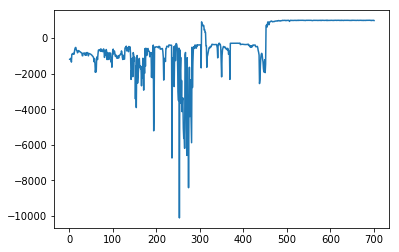

In [70]:
## TODO: Plot the rewards.
plt.plot(plot_data['episode'], plot_data['total_reward'])
plt.legend()
_ = plt.ylim()

In [71]:
print(np.max(plot_data['total_reward']))
print(np.sum(plot_data['total_reward'][-10:])/10)
print(np.sum(plot_data['total_reward'][:10])/10)

998.057794473
989.210751822
-1053.88053194


## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

我自己没有使用预定于好的task.py，四个任务：起飞，盘旋，从A移动到B，着落，我先完成的是起飞任务。对于奖励函数，我定义了
`reward = 1. - .35 * (abs(self.sim.pose[:3] - self.target_pos)).sum()`相关的影响因子有：在平面范围的摇摆偏离程度，距离目标的远近和正向速度。

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

1.用的算法有本课程示例讲解的深度Q学习算法，我实习了它的DDPG，Actor和Critic。
2.当然，肯定不能原搬照套，我还是改了一下他的参数: gamma=.95, batch=64, tau=.001。
3.Actor神经网络架构的化，使用了3隐藏层的网络架构，激活函数为relu，使用了BatchNormalization和Dropout(0.5)。每层神经元个数分别为32,64,32。
当然Critic神经网络架构依然一样，只是隐藏层分为2部分，state和action，之后再整合到一起。而state和action与Actor的架构基本一致。
 

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

我们的Agent在刚开始的时候仅仅处于探索阶段，一般来说，这个阶段表现效果很差，奖励很低。之后agent会逐步利用它所学到的一些知识并选择相应的动作，
并为接下来的episodes带来更多的累积奖励。当然这个过程也会伴随着学习过程，所有，有时候奖励也会有忽高忽低的现象，如果能够找到一条最佳或者最优方
案，基本就算学习成功了。当然，这一切都不是简单的过程，要经过无数次的试错才能达到最后的良好效果。

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

对我而言，最难的部分是开始。花了很多时间才弄清楚我真正想要达到的是什么。之后，修改Actor和Critic的架构花费了我一部分时间。而且我必须为Agent
设置适当的层数才能开始学习。感觉奖励函数的改变对Agent的学习过程影响挺大的。